<a href="https://colab.research.google.com/github/carlbell/latticetools/blob/main/latticetools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tools used for visualizing lattices and for finding good example instances of LLL reduction for decrypting Merkle-Hellman knapsack cryptoscheme messages.


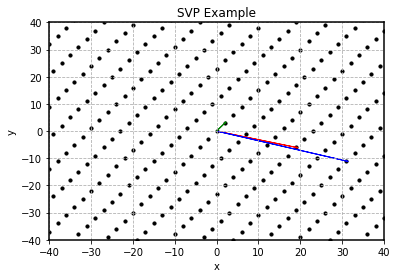

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two lattice basis vectors a and b
a = np.array([19, -6])
b = np.array([31, -11])

# Create a meshgrid for plotting
x, y = np.meshgrid(range(-100, 100), range(-100, 100))

# Compute the lattice points using the basis vectors
lattice_points = np.zeros((len(x.flatten()), 2))
for i in range(len(x.flatten())):
    lattice_points[i] = x.flatten()[i] * a + y.flatten()[i] * b

# Plot the lattice points
plt.scatter(lattice_points[:,0], lattice_points[:,1], color='black', s=10)

# Plot the basis vectors
plt.arrow(0, 0, a[0], a[1], head_width=0.3, head_length=0.5, fc='r', ec='r')
plt.arrow(0, 0, b[0], b[1], head_width=0.3, head_length=0.5, fc='b', ec='b')

plt.arrow(0, 0, 2, 3, head_width=0.3, head_length=0.5, fc='g', ec='g')

# Set the plot limits and labels
plt.xlim([-40, 40])
plt.ylim([-40, 40])
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVP Example')
plt.grid(linestyle='--')
plt.savefig('svp_example.png',dpi=600)


# Show the plot
plt.show()

In [ ]:
, nan
import numpy as np
#Import math Library
import math 

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)
import sys
import json
import numpy as np
from numpy import linalg as la

__author__ = "Raj Kane"
__version__ = "Spring 2019"

basis = latex_to_array(matrix).transpose() # Initialize the basis as the user input.
orthobasis = basis.copy()   # Initialize the Gram-Schmidt basis.

k = 1 # Initialize the working index.
DELTA = 0.91

def projection_scale(u, v):
    '''Computes <u,v>/<u,u>, which is the scale used in projection.'''
    return np.dot(u, v) / np.dot(u, u)

def proj(u, v):
    '''Computes the projection of vector v onto vector u. Assumes u is not zero.'''
    return np.dot(projection_scale(u, v), u)

def gram_schmidt(): 
    '''Computes Gram Schmidt orthoganalization (without normalization) of a basis.'''
    orthobasis[0] = basis[0]
    for i in range(1, basis.shape[1]):  # Loop through dimension of basis.
        orthobasis[i] = basis[i]
        for j in range(0, i):
            orthobasis[i] -= proj(orthobasis[j], basis[i])
    return orthobasis

def reduction():
    '''Performs length reduction on a basis.'''
    total_reduction = 0 # Track the total amount by which the working vector is reduced.
    for j in range(k-1, -1, -1):   # j loop. Loop down from k-1 to 0.
        m = round(projection_scale(orthobasis[j], basis[k]))
        total_reduction += np.dot(m, basis[j])[0]
        basis[k] -= np.dot(m, basis[j]) # Reduce the working vector by multiples of preceding vectors.
    if total_reduction > 0:
        gram_schmidt() # Recompute Gram-Scmidt if the working vector has been reduced. 

def lovasz():
    global k
    '''Checks the Lovasz condition for a basis. Either swaps adjacent basis vectors and recomputes Gram-Scmidt or increments the working index.'''
    c = DELTA - projection_scale(orthobasis[k-1], basis[k])**2
    if la.norm(orthobasis[k])**2 >= np.dot(c, la.norm(orthobasis[k-1]**2)): # Check the Lovasz condition.
        k += 1  # Increment k if the condition is met.
    else: 
        basis[[k, k-1]] = basis[[k-1, k]] # If the condition is not met, swap the working vector and the immediately preceding basis vector.
        gram_schmidt() # Recompute Gram-Schmidt if swap
        k = max([k-1, 1])

def main():
    gram_schmidt()
    steps = 0
    while k <= basis.shape[1] - 1:
        reduction()
        steps += 1
        print('\\begin{block}{Step ', steps, 'of LLL,', 'reduction step}\\begin{center} $M=', bmatrix(basis.transpose()),'$ \\end{center}\\end{block}')
        lovasz()
        steps +=1
        print('\\begin{block}{Step ', steps, 'of LLL.', 'checking Lovasz condition}\\begin{center} $M=', bmatrix(basis.transpose()),'$ \\end{center}\\end{block}')
    print('LLL Reduced Basis:\n', basis.transpose())


import re
import numpy as np
import random
def latex_to_array(latex_str):
    # Extract the rows of the matrix from the LaTeX string
    no_spaces_str = re.sub(r"\s+", "", latex_str)
    rows = re.split(r"\\\\", no_spaces_str, re.DOTALL)
    #print(rows)
    # Extract the elements of each row and convert them to floats
    array = np.array([[float(elem) for elem in row.split('&')] for row in rows])
    return array
superincreasing_sum =0
def superincreasing_maker(k,s):
  global superincreasing_sum
  superincreasing_sum = s
  yield s
  element_i = 1
  while element_i < k:
    n = superincreasing_sum + random.randint(1, 7)
    superincreasing_sum += n
    yield n
    element_i +=1


    

matrix1 = """
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\\\
-82 & -123 & -287 & -83 & -248 & -373 & -10 & -471 & 548"""

matrix = """
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\\\
82 & 123 & 287 & 83 & 248 & 373 & 10 & 471 & 548"""
np.set_printoptions(suppress=True)
while(True):
  DELTA = 0.8125
  KNAP_SIZE=8
  superincreasing = np.array([a for a in superincreasing_maker(KNAP_SIZE,3)])
  m=random.randint(40,100)
  print("m", m)
  print("superincreasing", superincreasing)
  print("superincreasing_sum", superincreasing_sum)
  n = superincreasing_sum + 1
  while not math.gcd(n,m) == 1:
    n += 1
  print("n",n)
  publickey = np.array([(a * m % n) for a in superincreasing])
  print("publickey",publickey)
  basis = np.identity(KNAP_SIZE)

  cleartext = 150
  cleartext_binary = np.array([int(x) for x in bin(cleartext)[2:]])
  padding_needed = KNAP_SIZE - len(cleartext_binary)
  if padding_needed > 0:
    padding = np.zeros((padding_needed))
    print(cleartext_binary.shape)
    cleartext_binary = np.hstack((padding, cleartext_binary))

  print("cleartext_binary", cleartext_binary)
  ciphertext = np.dot(cleartext_binary, publickey)
  print("ciphertext",ciphertext)
  bottom_row = np.append(publickey,-1 *ciphertext)
  print("bottom_row", bottom_row)

  # Horizontally stack the column of zeros to the right of the array
  basis = np.hstack((basis, np.zeros((basis.shape[0], 1))))
  basis = np.vstack((basis, bottom_row))
  print(bmatrix(np.rint(basis)))
  basis = np.transpose(basis)
  #basis = latex_to_array(matrix).transpose() # Initialize the basis as the user input.
  orthobasis = basis.copy()   # Initialize the Gram-Schmidt basis.

  k = 1 # Initialize the working index.
  print(DELTA)
  main()
  break
  





m 86
superincreasing [  3   5  13  24  52  99 198 395]
superincreasing_sum 789
n 791
publickey [258 430 327 482 517 604 417 748]
cleartext_binary [1 0 0 1 0 1 1 0]
ciphertext 1761
bottom_row [  258   430   327   482   517   604   417   748 -1761]
\begin{bmatrix}
  1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 1. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 1. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 1. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 1. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 1. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 1. & 0.\\
  258. & 430. & 327. & 482. & 517. & 604. & 417. & 748. & -1761.\\
\end{bmatrix}
0.8125
\begin{block}{Step  1 of LLL, reduction step}\begin{center} $M= \begin{bmatrix}
  1. & -2. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 1. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 1. & 0. & 0. & 0. & 0. & 0.\\
  0.

In [ ]:
from hsnf import column_style_hermite_normal_form, row_style_hermite_normal_form, smith_normal_form

